# Image inspection

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from bcd.utils.paths import data_raw_dir
from bcd.utils.analyze_images import analyze_images
from bcd.visualization.visualize import (
    plot_size_distribution,
    plot_aspect_ratio_distribution,
    display_sample_images,
)

sns.set_theme()

## Load info

In [3]:
dataset = pd.read_csv(data_raw_dir("train.csv"))
dataset["image_name"] = dataset["patient_id"].astype(str) + "_" + dataset["image_id"].astype(str) + ".png"

target = 'cancer'

display(dataset)

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id,cancer,image_name
0,2,10006,462822612,L,CC,61.0,0,29,10006_L,0,10006_462822612.png
1,2,10006,1459541791,L,MLO,61.0,0,29,10006_L,0,10006_1459541791.png
2,2,10006,1864590858,R,MLO,61.0,0,29,10006_R,0,10006_1864590858.png
3,2,10006,1874946579,R,CC,61.0,0,29,10006_R,0,10006_1874946579.png
4,2,10011,220375232,L,CC,55.0,0,21,10011_L,0,10011_220375232.png
...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,49,9973_R,0,9973_1729524723.png
54702,1,9989,63473691,L,MLO,60.0,0,216,9989_L,0,9989_63473691.png
54703,1,9989,1078943060,L,CC,60.0,0,216,9989_L,0,9989_1078943060.png
54704,1,9989,398038886,R,MLO,60.0,0,216,9989_R,0,9989_398038886.png


## Target variable distribution

In [4]:
dataset[target].value_counts()

cancer
0    53548
1     1158
Name: count, dtype: int64

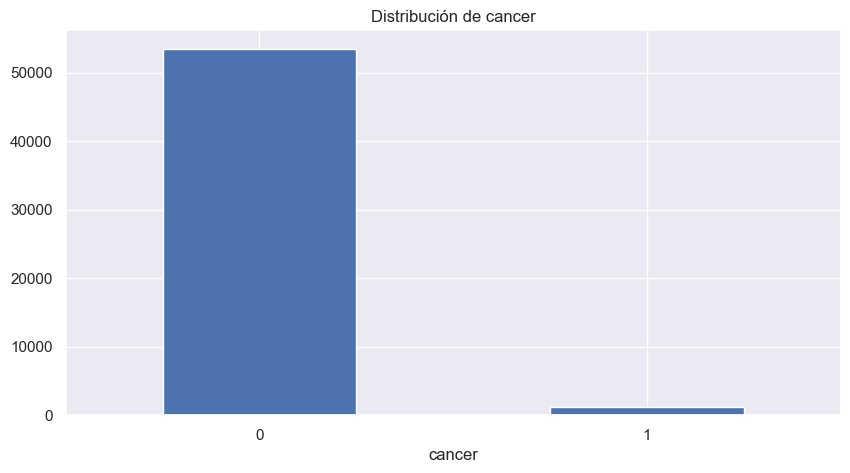

In [5]:
plt.figure(figsize=(10, 5))
dataset[target].value_counts().plot(kind='bar')
plt.title(f'Distribución de {target}')
plt.xticks(rotation=0)
plt.show()

Lets perform an analysis of the images to establish the hyperparameters related to the dimensionality of the input for a convolutional network. That is, the input_shape which corresponds to a tuple (width, height, n_channels).

In [7]:
df_sample = dataset.sample(100)
images_paths = "train/" + df_sample[target].astype(str) + "/" + df_sample['image_name']
widths, heights, aspects = analyze_images(images_paths)

In [8]:
# Print summary statistics
print(f"Total images analyzed: {len(widths)}")
print(f"Width - Min: {min(widths)}, Max: {max(widths)}, Mean: {np.mean(widths):.2f}, Median: {np.median(widths)}")
print(f"Height - Min: {min(heights)}, Max: {max(heights)}, Mean: {np.mean(heights):.2f}, Median: {np.median(heights)}")
print(f"Aspect Ratio - Min: {min(aspects):.2f}, Max: {max(aspects):.2f}, Mean: {np.mean(aspects):.2f}, Median: {np.median(aspects):.2f}")

# Find most common sizes
common_sizes = Counter(zip(widths, heights)).most_common(5)
print("\nMost common image sizes:")
for size, count in common_sizes:
    print(f"{size}: {count} images")

# Recommend image size
recommended_width = int(np.median(widths))
recommended_height = int(np.median(heights))
print(f"\nRecommended image size for the network: {recommended_width}x{recommended_height}")
print("Note: Round to the nearest multiple of 32 for optimal performance with most CNN architectures.")

# Adjust if necessary to be multiples of 32
recommended_width = ((recommended_width + 31) // 32) * 32
recommended_height = ((recommended_height + 31) // 32) * 32
print(f"Adjusted recommended size: {recommended_width}x{recommended_height}")

Total images analyzed: 100
Width - Min: 256, Max: 256, Mean: 256.00, Median: 256.0
Height - Min: 256, Max: 256, Mean: 256.00, Median: 256.0
Aspect Ratio - Min: 1.00, Max: 1.00, Mean: 1.00, Median: 1.00

Most common image sizes:
(256, 256): 100 images

Recommended image size for the network: 256x256
Note: Round to the nearest multiple of 32 for optimal performance with most CNN architectures.
Adjusted recommended size: 256x256


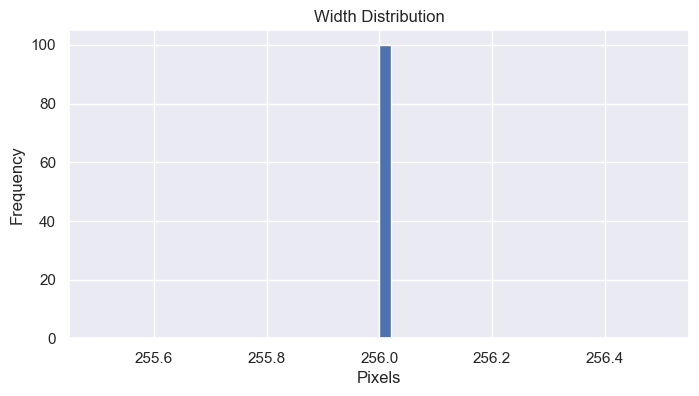

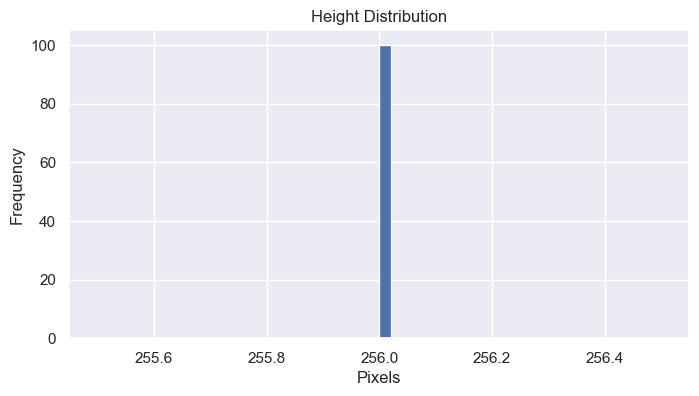

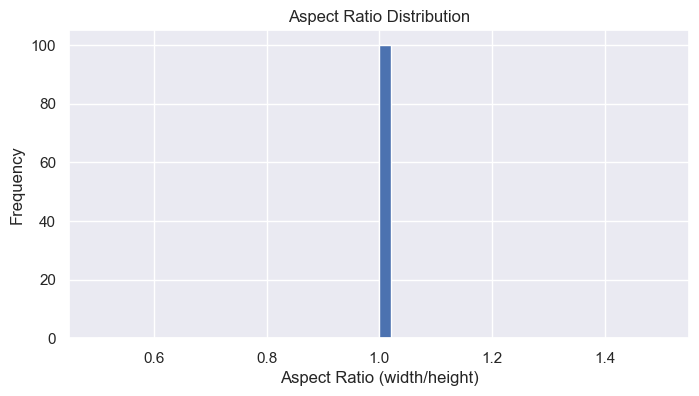

In [9]:
# Plot distributions
plot_size_distribution(widths, 'Width')
plot_size_distribution(heights, 'Height')
plot_aspect_ratio_distribution(aspects)

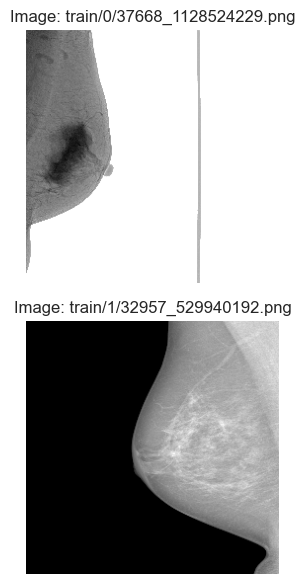

In [36]:
# Display sample images
display_sample_images(images_paths, 2)